In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('Social_Network_Ads.csv')
x=dataset.iloc[:, [2,3]].values
y=dataset.iloc[:,4].values

In [6]:
from sklearn.cross_validation import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
xtrain=scx.fit_transform(xtrain)
xtest=scx.fit_transform(xtest)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
ypred=classifier.predict(xtest)

In [11]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(ytest,ypred)

In [12]:
cm

array([[63,  5],
       [ 7, 25]], dtype=int64)

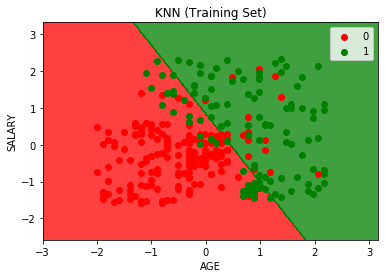

In [13]:
from matplotlib.colors import ListedColormap
xset,yset=xtrain,ytrain
x1,x2=np.meshgrid(np.arange(start=xset[:,0].min()-1, stop=xset[:,0].max()+1, step=0.01),
                 np.arange(start=xset[:,1].min()-1, stop=xset[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset==j,0],xset[yset==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('KNN (Training Set)')
plt.xlabel('AGE')
plt.ylabel('SALARY')
plt.legend()
plt.show()
    